This notebook aims to explain the mandelbrot set a bit better and expose the logic by which is created.

In [14]:
# Define global vars

# Defining our canvas
width: int = 500
height: int = 500
# Defining how many iterations we would like to do on each point
MAX_ITERS: int = 200

# Limiting our coordinates to the region interest, the converging area
min_x: float = -2.0
max_x: float = 0.6
min_y: float = -1.5
max_y: float = 1.5

In [15]:
import numpy as np
import cmath
import time
from typing import Any

# Function to calculate whether a point is in the Mandelbrot set
def mandelbrot_kernel(c: complex) -> int:
    """
    Compute the number of steps to escape for a given complex number 'c'.
    The function iterates z = z^2 + c, starting with z = c, until |z| > 2 (equivalently, z's squared norm > 4)
    or the maximum number of iterations is reached.
    The function returns the number of iterations it took for |z| to exceed 2, or MAX_ITERS if it did not.
    """
    z: complex = c
    for i in range(MAX_ITERS):
        # The main logic of Mandelbrot set. For a given complex number 'c',
        # we perform the operation z = z^2 + c repeatedly and check whether
        # the absolute value of 'z' exceeds 2 (or, equivalently, whether the
        # squared norm exceeds 4). If it does, we say that 'c' is not in the
        # Mandelbrot set and return the number of iterations it took to escape.
        z = z * z + c
        if abs(z) > 2:
            return i
    # If 'c' did not escape within MAX_ITERS iterations, we assume it is in
    # the Mandelbrot set and return MAX_ITERS.
    return MAX_ITERS

def compute_mandelbrot(min_x: float, max_x: float, 
                        min_y: float, max_y: float, 
                        width: int, height: int) -> np.ndarray:
    """
    Compute an image of the Mandelbrot set within a specified bounding box
    (min_x, max_x, min_y, max_y) and with a specified size (width x height).
    Each pixel in the image corresponds to a complex number c in the bounding box,
    and its value is determined by mandelbrot_kernel(c).
    """
    start_time: float = time.time()
    
    # Create an empty array. Each element of the array corresponds to a pixel.
    t: np.ndarray = np.empty((height, width))

    dx: float = (max_x - min_x) / width
    dy: float = (max_y - min_y) / height

    y: float = min_y
    for row in range(height):
        x: float = min_x
        for col in range(width):
            # For each pixel (col, row), we compute a complex number 'c' based
            # on its x and y coordinates. We then call mandelbrot_kernel(c) to
            # determine whether 'c' is in the Mandelbrot set. The result is
            # stored in our image array 't'.
            t[row, col] = mandelbrot_kernel(complex(x, y))
            x += dx
        y += dy
    
    end_time: float = time.time()
    
    print(f"Time taken: {end_time - start_time} seconds")
    
    return t

Time taken: 1.172288417816162 seconds


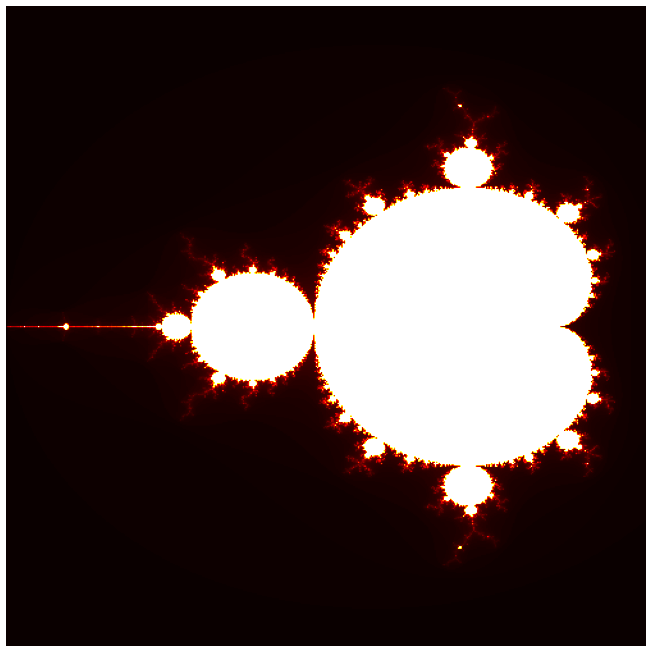

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def show_plot(tensor: np.ndarray) -> None:
    """
    Visualize the Mandelbrot set using matplotlib.
    The function shades each point in the image according to its escape time,
    using a colormap ('hot') and normalization (PowerNorm) that highlight the details of the set.
    The result is displayed as an image.
    """
    # Set the scale and dpi for the plot
    scale : int = 10
    dpi: int  = 64

    # Convert the tensor to a numpy array
    numpy_array = tensor

    # Create a figure with the specified scale and dpi
    fig = plt.figure(1, [scale, scale * height // width], dpi)

    # Add an axes to the figure
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frame_on=False)

    # Plot the numpy array without any shading or color blending
    plt.imshow(numpy_array, cmap='hot')

    # Remove the axis
    plt.axis("off")

    # Show the plot
    plt.show()

# Compute and visualize the Mandelbrot set within the specified bounding box and size
show_plot(compute_mandelbrot(min_x, max_x, min_y, max_y, width, height))
